In [4]:
pwd

'C:\\Users\\KAVINYUVA\\Downloads'

In [5]:
# Image Augmentation

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [8]:
pwd

'C:\\Users\\KAVINYUVA\\Downloads'

In [96]:
x_train = train_datagen.flow_from_directory(r'C:\Users\KAVINYUVA\Downloads\SmartInternzVideo\fruit-dataset\train',target_size = (64,64),batch_size=8,class_mode = 'categorical')
x_test = test_datagen.flow_from_directory(r'C:\Users\KAVINYUVA\Downloads\SmartInternzVideo\fruit-dataset\test',target_size = (64,64),batch_size=8,class_mode = 'categorical')

Found 5384 images belonging to 6 classes.
Found 1686 images belonging to 6 classes.


In [97]:
x_train.class_indices

{'Apple___Black_rot': 0,
 'Apple___healthy': 1,
 'Corn_(maize)___Northern_Leaf_Blight': 2,
 'Corn_(maize)___healthy': 3,
 'Peach___Bacterial_spot': 4,
 'Peach___healthy': 5}

In [98]:
x_test.class_indices

{'Apple___Black_rot': 0,
 'Apple___healthy': 1,
 'Corn_(maize)___Northern_Leaf_Blight': 2,
 'Corn_(maize)___healthy': 3,
 'Peach___Bacterial_spot': 4,
 'Peach___healthy': 5}

In [99]:
# CNN

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten

In [100]:
model = Sequential()
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

In [101]:
# Hidden Layers

model.add(Dense(64 ,activation='relu'))
model.add(Dense(64,activation = 'relu'))


In [102]:
# Output Layer

model.add(Dense(6,activation = 'softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 30752)             0         
                                                                 
 dense_19 (Dense)            (None, 64)                1968192   
                                                                 
 dense_20 (Dense)            (None, 64)                4160      
                                                                 
 dense_21 (Dense)            (None, 6)                 390       
                                                      

In [103]:
import tensorflow as tf
tf.__version__

'2.9.1'

In [104]:
#model.fit_generator(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)
model.fit(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)
#model.fit(x_train,steps_per_epoch=5384//8,validation_data=x_test,validation_steps=1686//8,epochs=5)

Epoch 1/10
673/673 [==============================] - 20s 29ms/step - loss: 0.5715 - accuracy: 0.7983 - val_loss: 0.3106 - val_accuracy: 0.8992
Epoch 2/10
673/673 [==============================] - 19s 29ms/step - loss: 0.2945 - accuracy: 0.8960 - val_loss: 0.1812 - val_accuracy: 0.9330
Epoch 3/10
673/673 [==============================] - 19s 29ms/step - loss: 0.2208 - accuracy: 0.9201 - val_loss: 0.2089 - val_accuracy: 0.9265
Epoch 4/10
673/673 [==============================] - 20s 29ms/step - loss: 0.1860 - accuracy: 0.9335 - val_loss: 0.1441 - val_accuracy: 0.9514
Epoch 5/10
673/673 [==============================] - 19s 28ms/step - loss: 0.1484 - accuracy: 0.9467 - val_loss: 0.1305 - val_accuracy: 0.9543
Epoch 6/10
673/673 [==============================] - 19s 29ms/step - loss: 0.1449 - accuracy: 0.9489 - val_loss: 0.2567 - val_accuracy: 0.9170
Epoch 7/10
673/673 [==============================] - 21s 31ms/step - loss: 0.1281 - accuracy: 0.9558 - val_loss: 0.1061 - val_accuracy:

In [70]:
# Saving The Model

model.save("fruits.h5")

In [71]:
pwd

'C:\\Users\\KAVINYUVA\\Downloads'

In [72]:
#Testing the model
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [74]:
#load the model
model = load_model('fruits.h5')

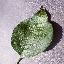

In [77]:
img = image.load_img(r'C:\Users\KAVINYUVA\Downloads\SmartInternzVideo\fruit-dataset\test\Apple___healthy\0f33804a-5389-49cc-abb1-c414b243991b___RS_HL 7321.jpg',target_size=(64,64))
img

In [78]:
x=image.img_to_array(img)

In [79]:
x

array([[[177., 168., 185.],
        [184., 175., 192.],
        [169., 160., 177.],
        ...,
        [160., 146., 161.],
        [171., 157., 172.],
        [164., 150., 165.]],

       [[172., 163., 180.],
        [174., 165., 182.],
        [179., 170., 187.],
        ...,
        [169., 155., 170.],
        [135., 121., 136.],
        [160., 146., 161.]],

       [[174., 165., 182.],
        [169., 160., 177.],
        [176., 167., 184.],
        ...,
        [168., 154., 169.],
        [142., 128., 143.],
        [157., 143., 158.]],

       ...,

       [[217., 211., 215.],
        [221., 215., 219.],
        [228., 222., 226.],
        ...,
        [177., 164., 174.],
        [187., 174., 184.],
        [137., 124., 134.]],

       [[224., 218., 222.],
        [219., 213., 217.],
        [224., 218., 222.],
        ...,
        [136., 123., 133.],
        [184., 171., 181.],
        [173., 160., 170.]],

       [[211., 205., 209.],
        [219., 213., 217.],
        [229., 2

In [80]:
x.ndim

3

In [81]:
x.shape

(64, 64, 3)

In [82]:
x=np.expand_dims(x,axis=0)

In [83]:
x

array([[[[177., 168., 185.],
         [184., 175., 192.],
         [169., 160., 177.],
         ...,
         [160., 146., 161.],
         [171., 157., 172.],
         [164., 150., 165.]],

        [[172., 163., 180.],
         [174., 165., 182.],
         [179., 170., 187.],
         ...,
         [169., 155., 170.],
         [135., 121., 136.],
         [160., 146., 161.]],

        [[174., 165., 182.],
         [169., 160., 177.],
         [176., 167., 184.],
         ...,
         [168., 154., 169.],
         [142., 128., 143.],
         [157., 143., 158.]],

        ...,

        [[217., 211., 215.],
         [221., 215., 219.],
         [228., 222., 226.],
         ...,
         [177., 164., 174.],
         [187., 174., 184.],
         [137., 124., 134.]],

        [[224., 218., 222.],
         [219., 213., 217.],
         [224., 218., 222.],
         ...,
         [136., 123., 133.],
         [184., 171., 181.],
         [173., 160., 170.]],

        [[211., 205., 209.],
       

In [85]:
y=np.argmax(model.predict(x),axis=1)

1/1 [==============================] - 0s 11ms/step


In [86]:
y

array([1], dtype=int64)

In [87]:
x_train.class_indices

{'Apple___Black_rot': 0,
 'Apple___healthy': 1,
 'Corn_(maize)___Northern_Leaf_Blight': 2,
 'Corn_(maize)___healthy': 3,
 'Peach___Bacterial_spot': 4,
 'Peach___healthy': 5}

In [88]:
index=['Apple___Black_rot',
 'Apple___healthy',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Peach___Bacterial_spot',
 'Peach___healthy']

In [89]:
index[y[0]]

'Apple___healthy'

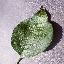

In [90]:
img = image.load_img(r'C:\Users\KAVINYUVA\Downloads\SmartInternzVideo\fruit-dataset\test\Apple___healthy\0f33804a-5389-49cc-abb1-c414b243991b___RS_HL 7321.jpg',target_size=(64,64))
img

In [91]:
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y = np.argmax(model.predict(x),axis=1)

index=['Apple___Black_rot',
 'Apple___healthy',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Peach___Bacterial_spot',
 'Peach___healthy']

index[y[0]]

1/1 [==============================] - 0s 5ms/step


'Apple___healthy'

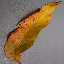

In [92]:
img = image.load_img(r'C:\Users\KAVINYUVA\Downloads\SmartInternzVideo\fruit-dataset\test\Peach___Bacterial_spot\0e37dd9c-c73d-403b-81c9-60c108607d1a___Rutg._Bact.S 1610.jpg',target_size=(64,64))
img

In [93]:
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y= np.argmax(model.predict(x),axis=1)

index=['Apple___Black_rot',
 'Apple___healthy',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Peach___Bacterial_spot',
 'Peach___healthy']
index[y[0]]

1/1 [==============================] - 0s 16ms/step


'Peach___Bacterial_spot'